In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import random
import tensorflow as tf
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
file_path = "/content/drive/MyDrive/Upi_fraud_dataset.csv"
df = pd.read_csv(file_path)

In [4]:
print(df.tail())

      TransactionID                                UserID   Amount  \
9995   610293350725  28a0bf08-e669-4d86-b364-0f89919344c9  5989.80   
9996   175104416875  602b95ae-4b6a-4634-a737-315abd50536d  2789.46   
9997   599972376879  224c6706-ee2f-492e-9a93-2c2bfcffae6d  5687.45   
9998   566478699602  9d0d4bd1-92f9-4614-a819-fa7ecf59ef78  9780.60   
9999   320777889190  c3e4833b-e190-499e-b7c7-f5f775acb69e  4700.97   

                Timestamp MerchantCategory TransactionType  \
9995  2024-05-31 12:58:57      Electronics             P2P   
9996  2024-04-25 20:09:53      Electronics             P2M   
9997  2024-04-30 05:06:59      Restaurants             P2P   
9998  2024-06-25 00:50:56        Utilities             P2P   
9999  2024-01-06 16:46:05      Restaurants             P2P   

                                  DeviceID       IPAddress   Latitude  \
9995  a8d05ec6-d526-424a-85b1-d29366877e2a    28.56.37.229  -2.330695   
9996  b75af5cc-f350-4336-9188-97366b2835e4  120.116.165.73 -

In [5]:
print(df.head())

   TransactionID                                UserID   Amount  \
0   842835309389  b0b99baa-1fd2-41e5-ac94-37aa0ec862f9  8589.00   
1   592863054785  0cc467c5-8b71-4ba4-9c75-4a9e2bec2c8c  9090.54   
2   373481869464  f7de03ee-b7f5-4568-8ba2-e889bced4d88  8814.41   
3   285572156436  456b3f39-e9cc-429f-8568-125612c12987  3971.25   
4   874207772966  7b4b734d-f0c5-4dce-8b9c-0b2e226abc86  4376.74   

             Timestamp MerchantCategory TransactionType  \
0  2024-01-22 03:59:58      Electronics             P2M   
1  2024-07-01 13:43:33      Electronics             P2M   
2  2024-04-02 05:23:39      Electronics             P2P   
3  2024-06-14 16:13:43      Restaurants             P2P   
4  2024-07-16 03:22:40        Groceries             P2M   

                               DeviceID        IPAddress   Latitude  \
0  42296fa1-8d7a-478c-a8c9-590b9d14cdb9    75.122.84.213  23.354478   
1  e566b8a8-17c3-4372-9e07-e4c4eb3113b7     16.110.81.53 -62.956912   
2  897d0824-bc4f-4ee7-9bfb-c8

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   UserID                10000 non-null  object 
 2   Amount                10000 non-null  float64
 3   Timestamp             10000 non-null  object 
 4   MerchantCategory      10000 non-null  object 
 5   TransactionType       10000 non-null  object 
 6   DeviceID              10000 non-null  object 
 7   IPAddress             10000 non-null  object 
 8   Latitude              10000 non-null  float64
 9   Longitude             10000 non-null  float64
 10  AvgTransactionAmount  10000 non-null  float64
 11  TransactionFrequency  10000 non-null  object 
 12  UnusualLocation       10000 non-null  bool   
 13  UnusualAmount         10000 non-null  bool   
 14  NewDevice             10000 non-null  bool   
 15  FailedAttempts      

In [7]:
df.isnull()

,TransactionID,UserID,Amount,Timestamp,MerchantCategory,TransactionType,DeviceID,IPAddress,Latitude,Longitude,AvgTransactionAmount,TransactionFrequency,UnusualLocation,UnusualAmount,NewDevice,FailedAttempts,FraudFlag,PhoneNumber,BankName
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

,0
TransactionID,0
UserID,0
Amount,0
Timestamp,0
MerchantCategory,0
TransactionType,0
DeviceID,0
IPAddress,0
Latitude,0
Longitude,0


<Axes: title={'center': 'missing data visualization in the dataset'}>

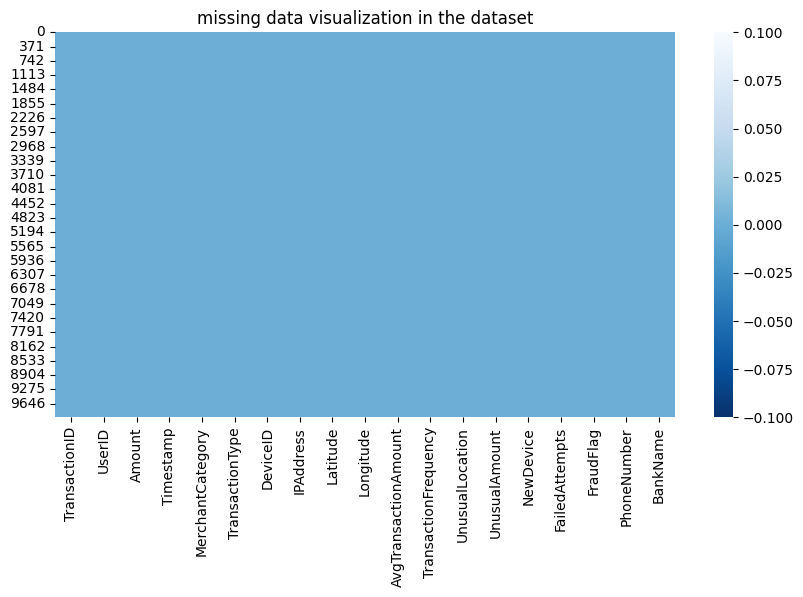

In [9]:
# To visualize the missing values

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(df.isnull(), cbar =True, cmap= "Blues_r")

In [10]:
df.describe()

,TransactionID,Amount,Latitude,Longitude,AvgTransactionAmount,FailedAttempts,PhoneNumber
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5.515428e+11,5004.460629,0.117162,0.168406,4988.532019,2.012600,3.085201e+11
std,2.595428e+11,2881.189782,52.080902,104.868717,2887.007255,1.416913,4.290684e+11
min,1.000276e+11,2.200000,-89.981366,-179.997289,1.550000,0.000000,1.593770e+05
25%,3.269720e+11,2526.945000,-45.123437,-90.746018,2497.180000,1.000000,3.809523e+09
50%,5.527816e+11,4951.010000,0.502523,0.373569,4947.515000,2.000000,7.582981e+09
75%,7.787159e+11,7528.650000,45.606327,91.905884,7487.210000,3.000000,9.124914e+11
max,9.997475e+11,9999.120000,89.976634,179.971566,9998.970000,4.000000,9.199982e+11


In [11]:
df.shape

(10000, 19)

In [12]:
df.columns

Index(['TransactionID', 'UserID', 'Amount', 'Timestamp', 'MerchantCategory',
       'TransactionType', 'DeviceID', 'IPAddress', 'Latitude', 'Longitude',
       'AvgTransactionAmount', 'TransactionFrequency', 'UnusualLocation',
       'UnusualAmount', 'NewDevice', 'FailedAttempts', 'FraudFlag',
       'PhoneNumber', 'BankName'],
      dtype='object')

In [13]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [ ]:
# Drop irrelevant columns
df.drop(columns=['TransactionID', 'UserID', 'DeviceID', 'IPAddress', 'PhoneNumber'], inplace=True)

In [14]:
# Encode categorical variables using one-hot encoding
categorical_cols = ['MerchantCategory', 'TransactionType', 'BankName']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [15]:
# Convert TransactionFrequency to numerical format
df['TransactionFrequency'] = df['TransactionFrequency'].str.extract('(\\d+)').astype(float)

In [16]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['Amount', 'Latitude', 'Longitude', 'AvgTransactionAmount', 'FailedAttempts', 'TransactionFrequency']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
# Split data into features (X) and target (y)
X = df.drop(columns=['FraudFlag'])
y = df['FraudFlag']


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Upi_fraud_dataset.csv")

# Keep only the original columns
original_columns = df.columns[:19]
df = df[original_columns]

# Separate fraudulent transactions
fraud_df = df[df["FraudFlag"] == True]
non_fraud_df = df[df["FraudFlag"] == False]

# Define how many synthetic fraud samples to generate
num_samples_to_add = len(non_fraud_df) - len(fraud_df)

# Create synthetic fraud samples by adding small variations
synthetic_fraud = fraud_df.sample(n=num_samples_to_add, replace=True, random_state=42).copy()

# Introduce minor variations to numerical columns
numeric_cols = ["Amount", "Latitude", "Longitude", "AvgTransactionAmount", "FailedAttempts"]
for col in numeric_cols:
    synthetic_fraud[col] += np.random.normal(loc=0, scale=0.01 * synthetic_fraud[col].std(), size=len(synthetic_fraud))

# Append the augmented fraudulent transactions to the original dataset
augmented_df = pd.concat([df, synthetic_fraud], ignore_index=True)[original_columns]

# Shuffle the dataset
augmented_df = augmented_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the augmented dataset to a new CSV file
augmented_file_path = "/content/drive/MyDrive/augmented_Upi_fraud_dataset.csv"
augmented_df.to_csv(augmented_file_path, index=False)

print("\nAugmented Dataset:")
print(augmented_df.head())
print(augmented_df.shape)
print(f"\nAugmented dataset saved to: {augmented_file_path}")

# Split dataset into training and testing sets
X = augmented_df.drop(columns=["FraudFlag"])
y = augmented_df["FraudFlag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display training and testing shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Augmented Dataset:
   TransactionID                                UserID       Amount  \
0   227066676484  45ce3a50-aaf5-4e24-8eab-6a408e14f1c0  2416.638328   
1   148551682656  b9954ec5-8c6e-4887-9667-85700eb1729b  2453.650218   
2   460166854065  02d6ac0c-df56-4c0e-953b-437d432c67b7  1171.400000   
3   684851710771  a7ff5289-0d9f-437d-bc24-2158c28cbae7  3498.570000   
4   595144161171  74460b6a-407c-40b1-a35b-efdfb6a2a169  5586.500396   

             Timestamp MerchantCategory TransactionType  \
0  2024-02-26 22:49:32           Travel             P2P   
1  2024-03-22 10:28:21         Clothing             P2M   
2  2024-05-19 14:16:29        Groceries             P2P   
3  2024-05-31 17:03:49      Electronics             P2M   
4  2024-01-30 12:06:02        Utilities             P2P   

                               DeviceID        IPAddress   Latitude  \
0  44c6e380-3c68-467f-98fe-38bb7c414c5e   166.207.50.211  62.331992   
1  6944d85b-1bd1-48c3-9899-b352e1aa6eb5  209.143.138.127

In [19]:
!pip install tensorflow_addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


Epoch 1/15
221/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5474 - loss: 0.9333
Epoch 1: val_accuracy improved from -inf to 0.62369, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5478 - loss: 0.9321 - val_accuracy: 0.6237 - val_loss: 0.8197 - learning_rate: 0.0010
Epoch 2/15
225/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6249 - loss: 0.8111
Epoch 2: val_accuracy improved from 0.62369 to 0.70227, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6250 - loss: 0.8110 - val_accuracy: 0.7023 - val_loss: 0.7411 - learning_rate: 0.0010
Epoch 3/15
218/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6828 - loss: 0.7528
Epoch 3: val_accuracy improved from 0.70227 to 0.74931, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6830 - loss: 0.7525 - val_accuracy: 0.7493 - val_loss: 0.6757 - learning_rate: 0.0010
Epoch 4/15
224/226 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7073 - loss: 0.7069
Epoch 4: val_accuracy improved from 0.74931 to 0.78611, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7075 - loss: 0.7069 - val_accuracy: 0.7861 - val_loss: 0.6282 - learning_rate: 0.0010
Epoch 5/15
223/226 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7400 - loss: 0.6650
Epoch 5: val_accuracy improved from 0.78611 to 0.80465, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7401 - loss: 0.6649 - val_accuracy: 0.8046 - val_loss: 0.5936 - learning_rate: 0.0010
Epoch 6/15
221/226 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7765 - loss: 0.6165
Epoch 6: val_accuracy improved from 0.80465 to 0.83066, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7765 - loss: 0.6165 - val_accuracy: 0.8307 - val_loss: 0.5490 - learning_rate: 0.0010
Epoch 7/15
221/226 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7955 - loss: 0.5817
Epoch 7: val_accuracy did not improve from 0.83066
226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7955 - loss: 0.5817 - val_accuracy: 0.8287 - val_loss: 0.5254 - learning_rate: 0.0010
Epoch 8/15
221/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8205 - loss: 0.5461
Epoch 8: val_accuracy improved from 0.83066 to 0.86359, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8204 - loss: 0.5463 - val_accuracy: 0.8636 - val_loss: 0.4844 - learning_rate: 0.0010
Epoch 9/15
219/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8228 - loss: 0.5274
Epoch 9: val_accuracy improved from 0.86359 to 0.87106, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8229 - loss: 0.5273 - val_accuracy: 0.8711 - val_loss: 0.4661 - learning_rate: 0.0010
Epoch 10/15
224/226 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8349 - loss: 0.5068
Epoch 10: val_accuracy improved from 0.87106 to 0.88046, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8349 - loss: 0.5068 - val_accuracy: 0.8805 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 11/15
223/226 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8624 - loss: 0.4640
Epoch 11: val_accuracy improved from 0.88046 to 0.89651, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8622 - loss: 0.4643 - val_accuracy: 0.8965 - val_loss: 0.4135 - learning_rate: 0.0010
Epoch 12/15
224/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8671 - loss: 0.4520
Epoch 12: val_accuracy improved from 0.89651 to 0.90343, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8670 - loss: 0.4521 - val_accuracy: 0.9034 - val_loss: 0.3861 - learning_rate: 0.0010
Epoch 13/15
219/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8752 - loss: 0.4313
Epoch 13: val_accuracy did not improve from 0.90343
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8750 - loss: 0.4316 - val_accuracy: 0.9023 - val_loss: 0.3981 - learning_rate: 0.0010
Epoch 14/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8867 - loss: 0.4195
Epoch 14: val_accuracy did not improve from 0.90343
226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8867 - loss: 0.4195 - val_accuracy: 0.9007 - val_loss: 0.3889 - learning_rate: 0.0010
Epoch 15/15
221/226 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8952 - loss: 0.3849
Epoch 15: val_accuracy improved from 0.90343 to 0.92501, saving model to /content/drive/MyDrive/UPI_FRAUD.h5


226/226 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8953 - loss: 0.3848 - val_accuracy: 0.9250 - val_loss: 0.3361 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 15.
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9248 - loss: 0.3370

Test Loss, Test Accuracy: [0.3360501229763031, 0.9250138401985168]
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Inference Time: 0.7382 seconds
Per-sample Inference Time: 0.000204 seconds

Final Validation Metrics:
Val Accuracy: 0.9250
Val Precision: 0.8746
Val Recall: 0.9923
Val F1 Score: 0.9297
Val Loss: 0.3361

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1807
         1.0       0.87      0.99      0.93      1807

    accuracy                           0.93      3614
   macro avg       0.93      0.93      0.92      3614
weighted avg       0.93      0.93      0.92      3614


Confusion Matrix:
[[1550  257]
 [  14 1793]]


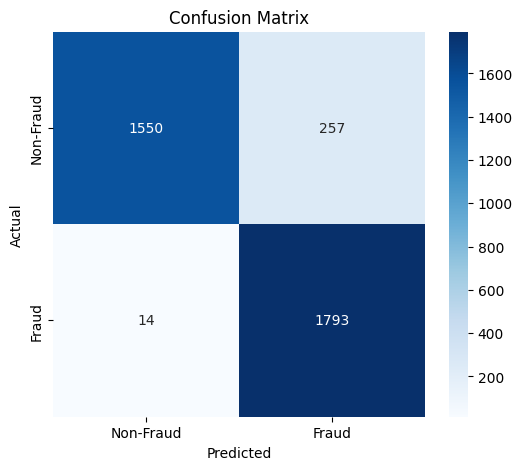


Model Complexity:
Total Parameters: 50049
Trainable Parameters: 49089
Model FLOPs: 0
✅ model_features.pkl saved.
✅ scaler.pkl saved.


In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import seaborn as sns

# Load the dataset
augmented_df = pd.read_csv("/content/drive/MyDrive/augmented_Upi_fraud_dataset.csv")

# Convert categorical columns to numerical if necessary
# Exclude 'FraudFlag' column from this loop, as we need it as a boolean target
for col in augmented_df.select_dtypes(include=['object']).columns:
    if col != 'FraudFlag':  # Exclude 'FraudFlag'
        augmented_df[col] = augmented_df[col].astype('category').cat.codes

# Convert 'FraudFlag' to numerical (0 or 1)
augmented_df['FraudFlag'] = augmented_df['FraudFlag'].astype(int)

# Split dataset into features and target
X = augmented_df.drop(columns=["FraudFlag"])
y = augmented_df["FraudFlag"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply class weighting
class_weights = {0: len(y) / (2 * sum(y == 0)), 1: len(y) / (2 * sum(y == 1))}

# Normalize numerical features
# Select only numerical columns for scaling
numerical_cols = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# ... (rest of the code remains the same)
# Define the FNN model
def create_fnn_model(input_shape):
    model = keras.Sequential([
        keras.Input(shape=(input_shape,)),
        layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
        layers.BatchNormalization(),
        layers.Dropout(0.1),

        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Get input shape
input_shape = X_train.shape[1]

# Create FNN model
fnn_model = create_fnn_model(input_shape)

# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/UPI_FRAUD.h5',
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1
)

# Ensure all data is in float32 format for TensorFlow compatibility
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Train model with class weights
history = fnn_model.fit(
    X_train, y_train,
    epochs=15, batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler, model_checkpoint],
    class_weight=class_weights
)


# Evaluate model
eval_results = fnn_model.evaluate(X_test, y_test)
print("\nTest Loss, Test Accuracy:", eval_results)

# Inference time calculation
start_time = time.time()
y_pred = (fnn_model.predict(X_test) > 0.5).astype(int)
end_time = time.time()
inference_time = end_time - start_time
inference_time_per_sample = inference_time / len(X_test)
print(f"\nInference Time: {inference_time:.4f} seconds")
print(f"Per-sample Inference Time: {inference_time_per_sample:.6f} seconds")

# Compute final validation metrics
val_precision = precision_score(y_test, y_pred)
val_recall = recall_score(y_test, y_pred)
val_f1 = f1_score(y_test, y_pred)
val_loss = eval_results[0]
val_accuracy = eval_results[1]

# Print Final Validation Metrics
print(f"\nFinal Validation Metrics:")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")
print(f"Val F1 Score: {val_f1:.4f}")
print(f"Val Loss: {val_loss:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Model Complexity
trainable_params = np.sum([np.prod(v.shape) for v in fnn_model.trainable_variables])
total_params = fnn_model.count_params()
print(f"\nModel Complexity:")
print(f"Total Parameters: {total_params}")
print(f"Trainable Parameters: {trainable_params}")

# Compute FLOPs (Floating Point Operations)
def get_flops(model):
    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
    flops = tf.compat.v1.profiler.profile(graph=tf.compat.v1.get_default_graph(),
                                          run_meta=run_meta, cmd='scope', options=opts)
    return flops.total_float_ops if flops is not None else 0

flops = get_flops(fnn_model)
print(f"Model FLOPs: {flops}")

# Save final model
fnn_model.save('/content/drive/MyDrive/UPI_FRAUD.h5')


# Save features and scaler for inference use
import joblib

feature_names = X_train.columns.tolist()
joblib.dump(feature_names, '/content/drive/MyDrive/model_features.pkl')
print("✅ model_features.pkl saved.")

joblib.dump(scaler, '/content/drive/MyDrive/scaler.pkl')
print("✅ scaler.pkl saved.")



In [ ]:
!pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com
!npm install -g localtunnel
!streamlit run '/content/drive/MyDrive/Colab Notebooks/app.py' & sleep 15 && npx localtunnel --port 8501

35.203.133.233
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹
changed 22 packages in 3s
⠹
⠹3 packages are looking for funding
⠹  run `npm fund` for details
⠹


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.203.133.233:8501

⠙⠹⠸⠼⠴your url is: https://major-paws-guess.loca.lt
